En este cuaderno realizamos el análisis exploratorio de los datos con los que construiremos el modelo. Importación de las librerías a usar:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import axes
import seaborn as sns
import numpy as np

Cargamos el dataset:

In [2]:
kobe_df = pd.read_csv('kobe_train.csv') # En este caso el dataset es el subconjunto de train del conjunto de 
                                        # datos original.

# ANÁLISIS EXPLORATORIO DE LAS VARIABLES

Procedo a realizar un análisis exploratorio de las variables del dataset. Debido a que el objetivo de este análisis exploratorio es que sirva a la construcción de un modelo de predicción, el análisis se realizará siempre o casi siempre referenciado a la variable respuesta o variable objetivo **shot_made_flag**.

Así, analizaré las distintas variables en función del número de disparos y el éxito de estos disparos.

In [3]:
kobe_df.columns # Las distintas variables del dataset.

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

En primer momento, podemos diferenciar las variables a analizar entre categóricas y cuantitativas:


- **Variables categóricas**: action_type, combined_shot_type, shot_type, period, playoffs, season, shot_zone_area, shot_zone_basic, shot_zone_range, matchup, opponent, shot_made_flag
- **Variables cuantitativas**: minutes_remaining, seconds_remaining, shot_distance, loc_x, loc_y.

Descarto el resto de variables porque no aportan información a los tiros realizados.


Comenzaré el análisis por las variables categóricas:


## Variables categóricas

### shot_made_flag

In [4]:
kobe_df['shot_made_flag'].unique() # Categorías de shot_made_flag.

array([0., 1.])

In [5]:
shot_flag = kobe_df['shot_made_flag'].value_counts() # Variable donde aparece la frecuencia de 1.0 y 0.0 en 
                                                      # el dataset.

In [6]:
shot_flag

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

Represento shot_made_flag en un gráfico de tarta, ya que me interesa ver la proporción de cada categoría:

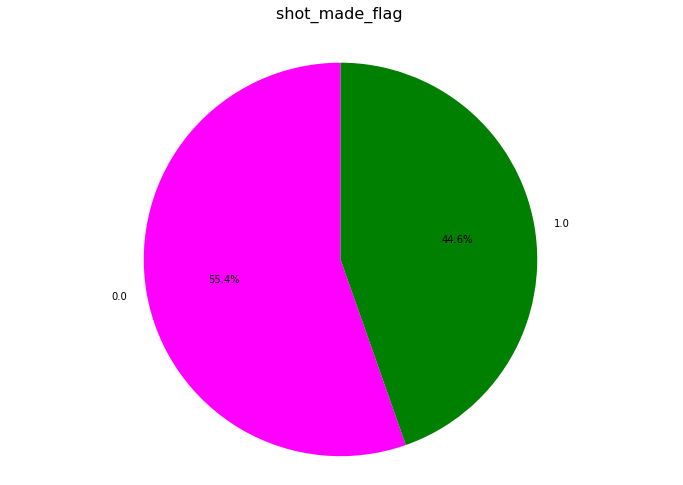

In [7]:
plt.figure(figsize=(12,8))
colors = ('magenta', 'green')

plt.pie(shot_flag.values,labels=shot_flag.index, colors=colors,autopct='%1.1f%%',
       startangle=90)


plt.title('shot_made_flag \n', fontsize=16)
plt.axis('equal')
plt.show()

Se observa que las frecuencias de 0.0 (no acierto) y 1.0 (acierto) se encuentran razonablemente equilibradas en el dataset, ambas clases con porcentajes cercanos al 50 % de los registros.

### period

In [8]:
kobe_df['period'].unique() # Categorías de period.

array([1, 2, 3, 4, 5, 6, 7])

In [9]:


kobe_period = kobe_df.groupby('period')['period'].count()# Variable donde se muestra la frecuencia  de registros 
                                                        # de las distinta categorías de "period". Period 
                                                        # respecto a nº de tiros.

In [10]:
kobe_period

period
1    6700
2    5635
3    7002
4    6043
5     280
6      30
7       7
Name: period, dtype: int64

Observamos la evolución del nº de tiros respecto a los periodos del juego:

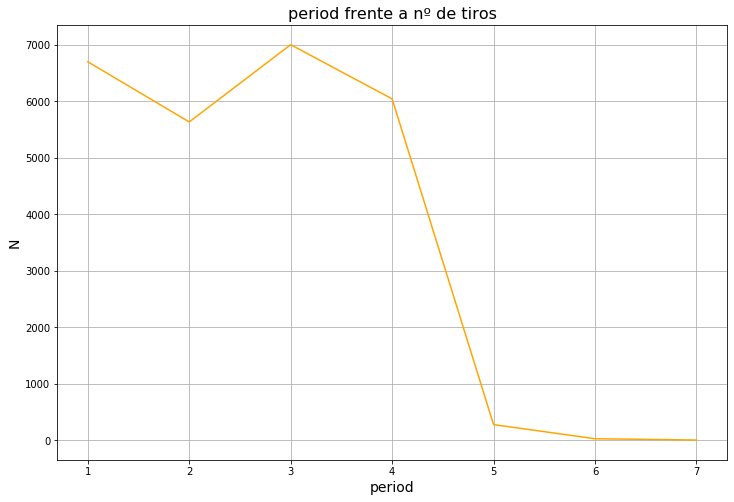

In [11]:
plt.figure(figsize=(12,8))


plt.plot(kobe_period.index, kobe_period.values, color='orange')
plt.xlabel('minutes_remaining', fontsize=12)


plt.xlabel('period', fontsize=14)
plt.ylabel('N', fontsize=14)
plt.grid()
plt.title('period frente a nº de tiros', fontsize=16)
plt.show()

Parece que es en el tercer periodo donde Kobe realiza más tiros a canasta, seguido del primer periodo .Esto puede explicarse debido a la costumbre en la NBA de utilizar los suplentes en el segundo cuarto, para dar descanso a los titulares, y  de descansar a los jugadores claves en el 4º periodo si en el partido el equipo va ganando con una amplia ventaja. Así, esto explica que Kobe intente más tiros en el primer y tercer periodo, pues es cuando tiene más actividad.

In [12]:
period_flag = kobe_df.groupby('period')['shot_made_flag'].mean() # variable donde aparecen categorías de period 
                                                                  # por media de 
                                                                # éxito de tiros.

Observamos las diferentes categorías de period frente a la media de éxito de tiros:

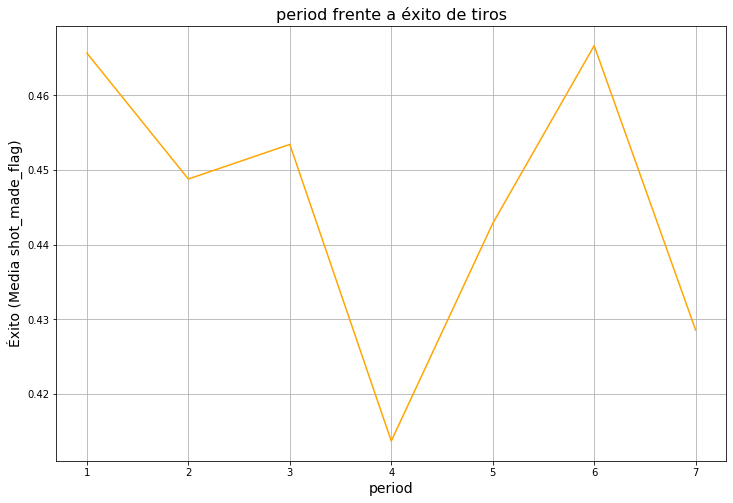

In [13]:
plt.figure(figsize=(12,8))
period = period_flag.index #categorías de period.
media_flag = period_flag.values #Valores de éxito por cada categoría de period.
plt.plot(period,media_flag,color='orange')
plt.xlabel('period', fontsize=14)
plt.ylabel('Éxito (Media shot_made_flag)', fontsize=14)
plt.title('period frente a éxito de tiros', fontsize=16)
plt.grid()
plt.show()

Parece que el éxito desciende conforme transcurren los periodos regulares (1,2,3,4), pero vuelve a ascender durante los periodos extra (5,6,7) hasta llegar a su cúspide en el ecuador del tiempo extra (periodo 6).

### action_type

In [14]:
kobe_df['action_type'].unique() # Categorías de action_type.

array(['Jump Shot', 'Driving Dunk Shot', 'Layup Shot',
       'Running Jump Shot', 'Reverse Dunk Shot', 'Slam Dunk Shot',
       'Driving Layup Shot', 'Turnaround Jump Shot', 'Reverse Layup Shot',
       'Tip Shot', 'Running Hook Shot', 'Alley Oop Dunk Shot',
       'Dunk Shot', 'Alley Oop Layup shot', 'Running Dunk Shot',
       'Driving Finger Roll Shot', 'Running Layup Shot',
       'Finger Roll Shot', 'Fadeaway Jump Shot', 'Follow Up Dunk Shot',
       'Hook Shot', 'Turnaround Hook Shot', 'Jump Hook Shot',
       'Running Finger Roll Shot', 'Jump Bank Shot',
       'Turnaround Finger Roll Shot', 'Hook Bank Shot',
       'Driving Hook Shot', 'Running Tip Shot',
       'Running Reverse Layup Shot', 'Driving Finger Roll Layup Shot',
       'Fadeaway Bank shot', 'Pullup Jump shot', 'Finger Roll Layup Shot',
       'Turnaround Fadeaway shot', 'Driving Reverse Layup Shot',
       'Driving Slam Dunk Shot', 'Step Back Jump shot',
       'Turnaround Bank shot', 'Reverse Slam Dunk Shot',
   

In [15]:

kobe_action = kobe_df['action_type'].value_counts()# Conteo de la frecuencia de las distintas categorías de action_type
                                                  # en el dataframe. Refleja las categorías de action_type respecto al
                                                  # nº de tiros.

In [16]:
kobe_action

Jump Shot                          15836
Layup Shot                          2154
Driving Layup Shot                  1628
Turnaround Jump Shot                 891
Fadeaway Jump Shot                   872
Running Jump Shot                    779
Pullup Jump shot                     402
Turnaround Fadeaway shot             366
Slam Dunk Shot                       334
Reverse Layup Shot                   333
Jump Bank Shot                       289
Driving Dunk Shot                    257
Dunk Shot                            217
Tip Shot                             151
Step Back Jump shot                  106
Alley Oop Dunk Shot                   95
Floating Jump shot                    93
Driving Reverse Layup Shot            83
Hook Shot                             73
Driving Finger Roll Shot              68
Alley Oop Layup shot                  67
Reverse Dunk Shot                     61
Driving Finger Roll Layup Shot        59
Turnaround Bank shot                  58
Running Layup Sh

Observamos la frecuencia con la que aperecen las distintas categorías de action_type. Es decir, cuantas veces efectuó Kobe ese tipo de acciones a lo largo de su carrera:

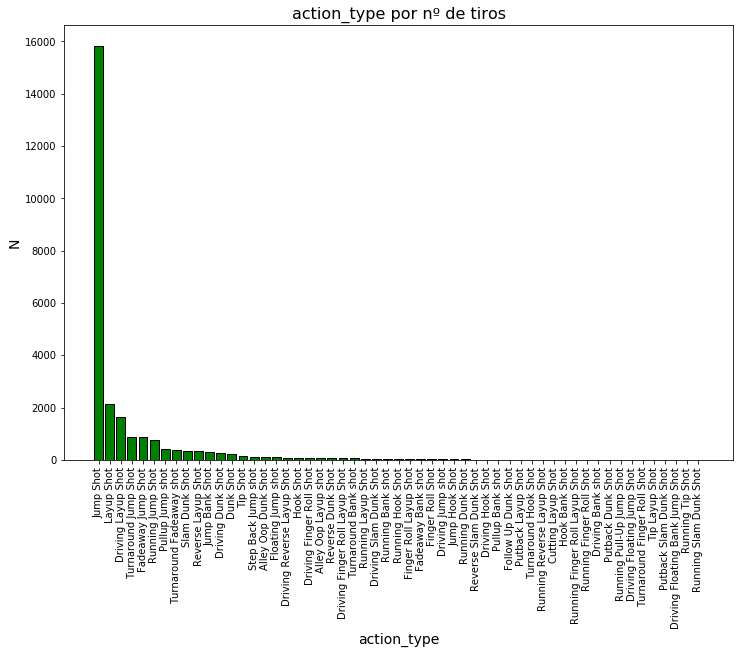

In [17]:
plt.figure(figsize=(12,8))
action_type = kobe_action.index # Categorías.
numero = kobe_action.values # Valores.
plt.bar(action_type,numero,color='green', edgecolor='black', width=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('action_type', fontsize=14)
plt.ylabel('N', fontsize=14)
plt.title('action_type por nº de tiros', fontsize=16)
plt.show()

Hay muchos tipos de acciones, pero en frecuencia de uso sólo se destacan unas pocas (Jump Shot, Layup Shot, Driving Layup Shot...).

Parece ser que el tipo de acción más usada por Kobe fue el Jump Shot.

In [18]:
action_flag = kobe_df.groupby('action_type')['shot_made_flag'].mean() #categorías de action_type por 
                                                                     #media de éxito en el tiro

In [19]:
action_flag = action_flag.sort_values(ascending=False) # Ordenamos descendentemente las categorías por éxito 
                                                       # de tiro para una visualización más intuitiva.

Observamos las distintas categorías de action_type por su media de éxito:

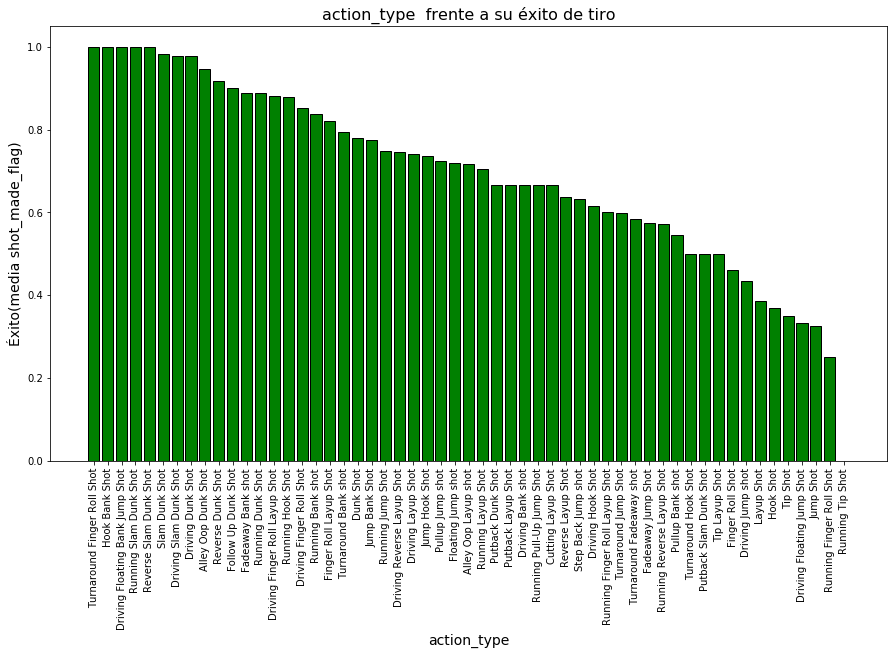

In [20]:
plt.figure(figsize=(15,8))
action_type = action_flag.index # Categorías.
media = action_flag.values # Valores.
plt.bar(action_type,media,color='green', edgecolor='black', width=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('action_type', fontsize=14)
plt.ylabel('Éxito(media shot_made_flag)', fontsize=14)
plt.title('action_type  frente a su éxito de tiro', fontsize=16)
plt.show()

Llama la atención que las acciones más usadas por Kobe no sean las que más éxito garantizan, ya que en este gráfico vemos  que las acciones con más media de éxito no son las más frecuentes.

### combined_shot_type

In [21]:
kobe_df['combined_shot_type'].unique() # Categorías de combined_shot_type.

array(['Jump Shot', 'Dunk', 'Layup', 'Tip Shot', 'Hook Shot', 'Bank Shot'],
      dtype=object)

In [22]:

kobe_combshot = kobe_df['combined_shot_type'].value_counts() # Variable con la frecuencia de las diferentes 
                                                             # categorías de combined_shot_type. Refleja 
                                                              # combined_shot_type por nº de tiros.

In [23]:
kobe_combshot = kobe_combshot.sort_values(ascending=False) # Para una mejor visualización ordenamos.
kobe_combshot

Jump Shot    19710
Layup         4532
Dunk          1056
Tip Shot       152
Hook Shot      127
Bank Shot      120
Name: combined_shot_type, dtype: int64

Observamos la frecuencia de las diferentes categorías de combined_shot_type, su frecuencia de uso por parte de Kobe:

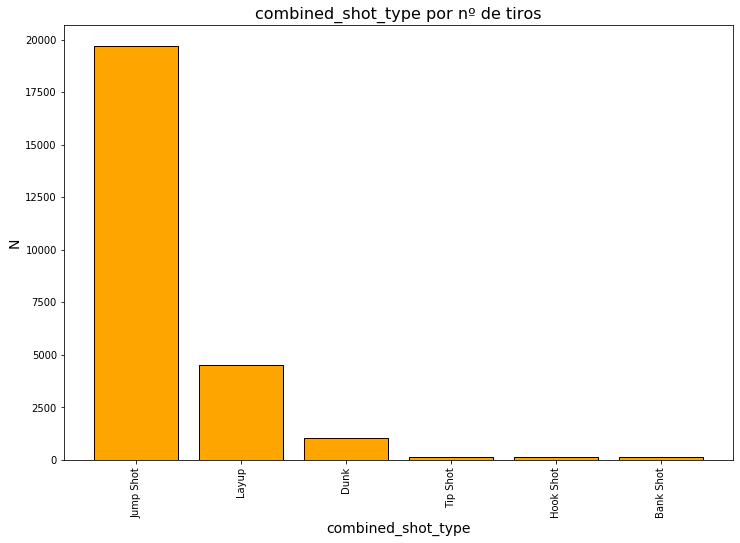

In [24]:
plt.figure(figsize=(12,8))
combined_shot = kobe_combshot.index # Categorías.
numero = kobe_combshot.values # Valores.
plt.bar(combined_shot,numero,color='orange', edgecolor='black', width=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('combined_shot_type', fontsize=14)
plt.ylabel('N', fontsize=14)
plt.title('combined_shot_type por nº de tiros', fontsize=16)
plt.show()

In [25]:
# Categorías de combined_shot_type por éxito de tiro:

ctype_flag=kobe_df.groupby('combined_shot_type')['shot_made_flag'].mean() 

In [26]:
ctype_flag=ctype_flag.sort_values(ascending=False)
ctype_flag

combined_shot_type
Dunk         0.928030
Bank Shot    0.791667
Layup        0.565093
Hook Shot    0.535433
Jump Shot    0.391071
Tip Shot     0.348684
Name: shot_made_flag, dtype: float64

Observamos el éxito de tiro de cada categoría de combined_shot_type:

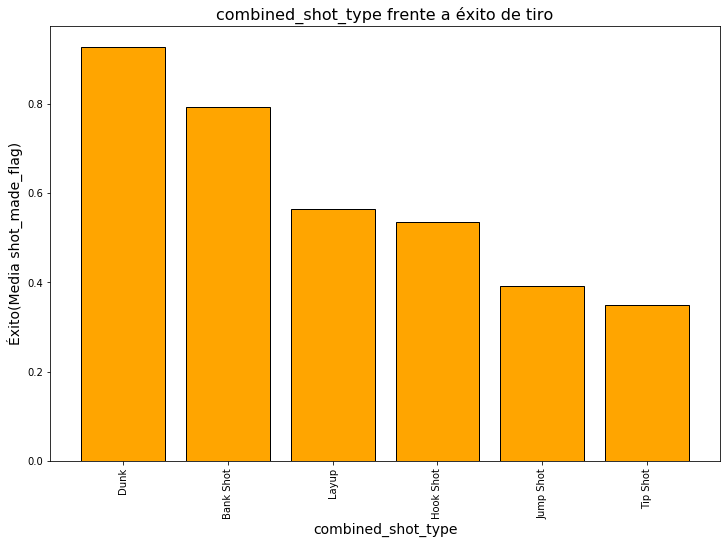

In [27]:
plt.figure(figsize=(12,8))
combined_shot = ctype_flag.index # Categorías.
media = ctype_flag.values # Valores.
plt.bar(combined_shot,media,color='orange', edgecolor='black', width=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('combined_shot_type', fontsize=14)
plt.ylabel('Éxito(Media shot_made_flag)', fontsize=14)
plt.title('combined_shot_type frente a éxito de tiro', fontsize=16)
plt.show()

Como pasó con action_type, las categorías que garantizan más éxito no son las que más se han llevado a cabo.

### shot_type

In [28]:
kobe_df['shot_type'].unique() # Categorías de shot_type.

array(['2PT Field Goal', '3PT Field Goal'], dtype=object)

In [29]:
shot_type = kobe_df['shot_type'].value_counts() # Variable con la frecuencia de las distintas categorías de 
                                                # shot_type en el dataset. Refleja shot respecto al nº de tiros.                                            

In [30]:
shot_type

2PT Field Goal    20285
3PT Field Goal     5412
Name: shot_type, dtype: int64

Observamos la frecuencia de tiros por categoría de shot_type:

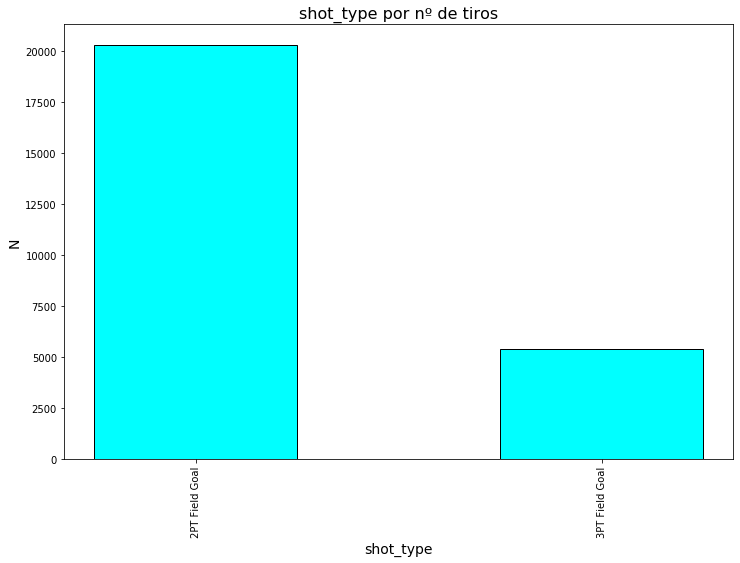

In [31]:
plt.figure(figsize=(12,8))
shot = shot_type.index # Categorías.
n = shot_type.values # Valores. 
plt.bar(shot,n,color='cyan', edgecolor='black', width=0.5)
plt.xticks(rotation='vertical')
plt.xlabel('shot_type', fontsize=14)
plt.ylabel('N', fontsize=14)
plt.title('shot_type por nº de tiros', fontsize=16)
plt.show()

A lo largo de su carrera, Kobe ha intentado muchos más tiros de dos puntos que de tres.

In [32]:
stype_flag=kobe_df.groupby('shot_type')['shot_made_flag'].mean() # Categorías de shot_type por su media de éxito.

Observamos el éxito que cada categoría de shot_type ha tenido a la hora de realizar tiros a canasta:

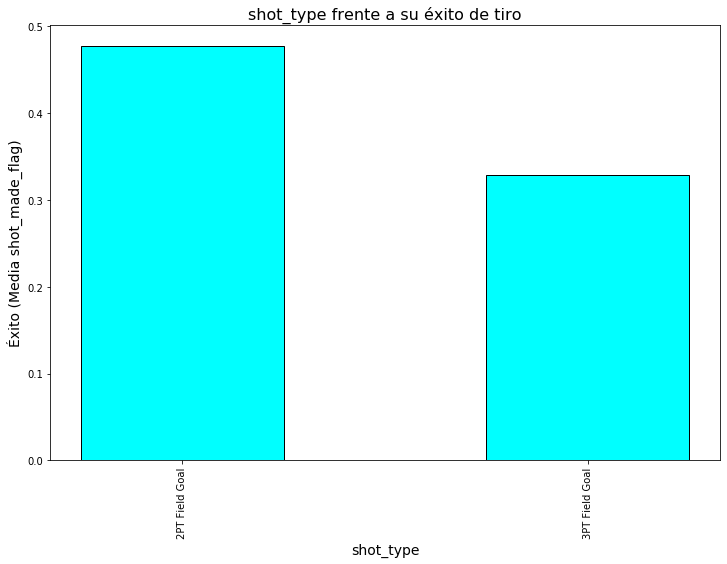

In [33]:
plt.figure(figsize=(12,8))
shot = stype_flag.index # Categorías.
media = stype_flag.values # Valores.
plt.bar(shot,media,color='cyan', edgecolor='black', width=0.5)
plt.xticks(rotation='vertical')
plt.xlabel('shot_type', fontsize=14)
plt.ylabel('Éxito (Media shot_made_flag)', fontsize=14)
plt.title('shot_type frente a su éxito de tiro', fontsize=16)
plt.show()

En la carrera de Kobe, los tiros de dos puntos han sido más frecuentes y más exitosos que los de tres puntos.

#### shot_zone_area

In [34]:
kobe_df['shot_zone_area'].unique() # Categorías de shot_zone_area.

array(['Left Side(L)', 'Left Side Center(LC)', 'Right Side Center(RC)',
       'Center(C)', 'Right Side(R)', 'Back Court(BC)'], dtype=object)

In [35]:


shot_zone = kobe_df['shot_zone_area'].value_counts() # Variable con la frecuencia de cada categoría de 
                                                    # shot_zone_area en el dataset. Refleja shot_zone_area 
                                                    # respecto al nº de tiros.

In [36]:
shot_zone

Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: shot_zone_area, dtype: int64

Observamos la frecuencia o nº de tiros por cada categoría de shot_zone_area:

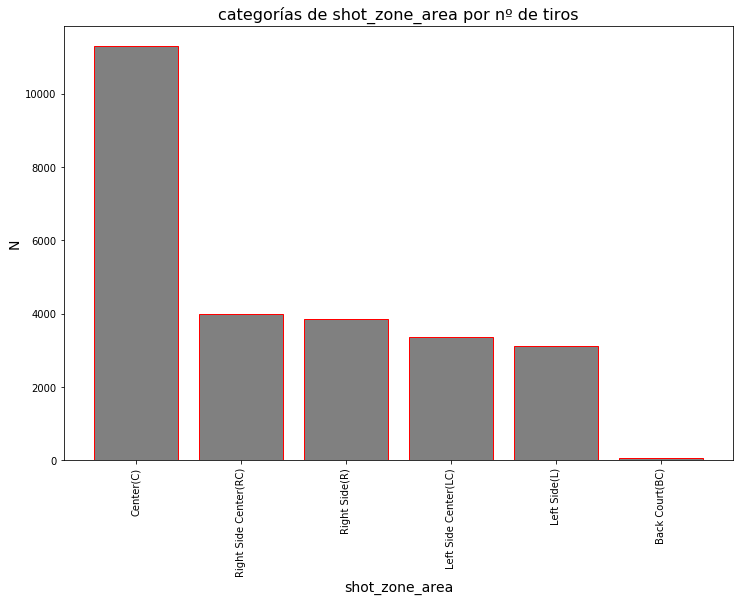

In [37]:
plt.figure(figsize=(12,8))
zone = shot_zone.index # Categorías.
n = shot_zone.values # Valores.
plt.bar(zone,n,color='gray', edgecolor='red', width=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('shot_zone_area', fontsize=14)
plt.ylabel('N', fontsize=14)
plt.title('categorías de shot_zone_area por nº de tiros', fontsize=16)
plt.show()

Kobe realizó un mayor número de tiros desde el área o posición central.

In [38]:
sza_flag = kobe_df.groupby('shot_zone_area')['shot_made_flag'].mean() # Categorías de shot_zone_area por éxito 
                                                                      # de tiro.

In [39]:
sza_flag = sza_flag.sort_values(ascending=False)


Observamos el éxito medio de tiro por cada una de las categoría de shot_zone_area:

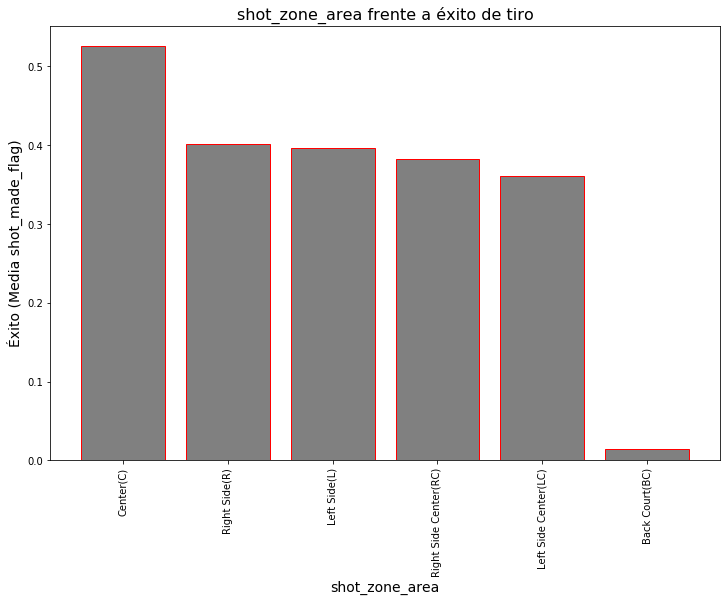

In [40]:
plt.figure(figsize=(12,8))
zone = sza_flag.index # Categorías.
media = sza_flag.values # Valores.
plt.bar(zone,media,color='gray', edgecolor='red', width=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('shot_zone_area', fontsize=14)
plt.ylabel('Éxito (Media shot_made_flag)', fontsize=14)
plt.title('shot_zone_area frente a éxito de tiro', fontsize=16)
plt.show()

También el centro fue el área con más éxito de tiro. Existen categorías que divergen en la comparación nº de tiros/éxito de tiro:  Right Side, Right Side Center, Left Side y Left Side Center.

### shot_zone_basic

In [41]:
kobe_df['shot_zone_basic'].unique() #Categorías de shot_zone_basic.

array(['Mid-Range', 'Restricted Area', 'In The Paint (Non-RA)',
       'Above the Break 3', 'Right Corner 3', 'Backcourt',
       'Left Corner 3'], dtype=object)

In [42]:
shot_basic = kobe_df['shot_zone_basic'].value_counts() # Variable con frecuencia de tiro en cada una de las 
                                                      # categorías de shot_zone_basic. Refleja shot_zone_basic 
                                                     # por nº de tiros.

Observamos la frecuencia o nº de tiros en cada una de las categorías de shot_zone_basic:

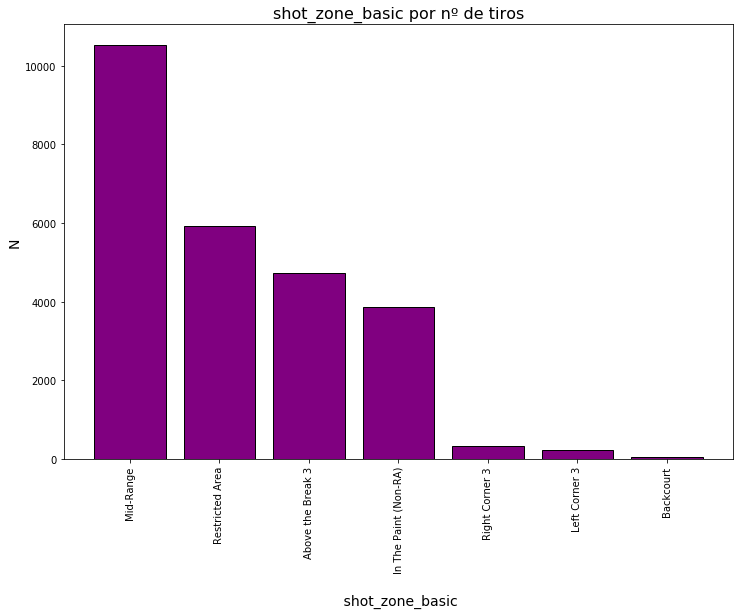

In [43]:
plt.figure(figsize=(12,8))
basic = shot_basic.index # Categorías.
n = shot_basic.values # Valores. 
plt.bar(basic,n,color='purple', edgecolor='black', width=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('\n shot_zone_basic', fontsize=14)
plt.ylabel('N', fontsize=14)
plt.title('shot_zone_basic por nº de tiros', fontsize=16)
plt.show()

La categoría más frecuente desde donde se realizaron disparos fue Mid-Range.

In [44]:
# Éxito medio de tiro en cada categoría de shot_zone_basic:

szb_flag = kobe_df.groupby('shot_zone_basic')['shot_made_flag'].mean() 

In [45]:
szb_flag = szb_flag.sort_values(ascending=False)

Observamos la eficiencia de los tiros realizados en cada categoría de shot_zone_basic:

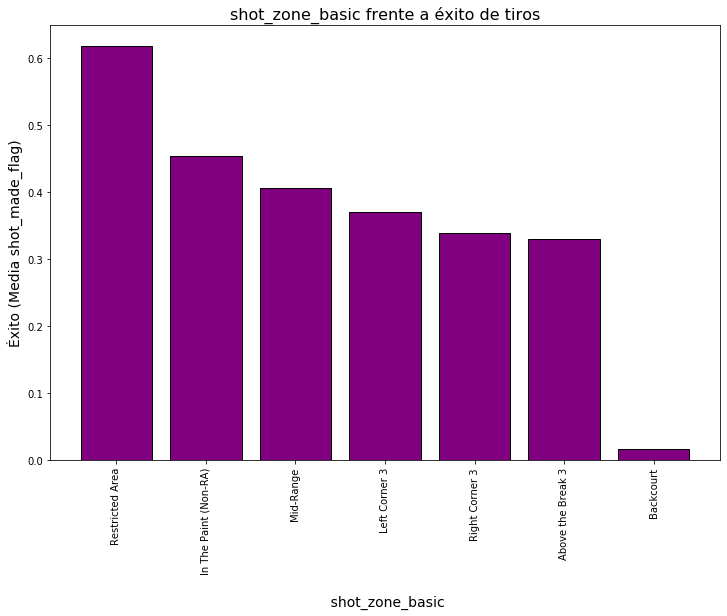

In [46]:
plt.figure(figsize=(12,8))
basic = szb_flag.index
media = szb_flag.values 
plt.bar(basic,media,color='purple', edgecolor='black', width=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('\n shot_zone_basic', fontsize=14)
plt.ylabel('Éxito (Media shot_made_flag)', fontsize=14)
plt.title('shot_zone_basic frente a éxito de tiros', fontsize=16)
plt.show()

La segunda categoría más frecuente es donde existen más éxitos de disparo.

### opponent

In [47]:
kobe_df['opponent'].unique() #Categorías de opponent.

array(['POR', 'UTA', 'VAN', 'LAC', 'HOU', 'SAS', 'DEN', 'SAC', 'CHI',
       'GSW', 'MIN', 'IND', 'SEA', 'DAL', 'PHI', 'DET', 'MIL', 'TOR',
       'MIA', 'PHX', 'CLE', 'NJN', 'NYK', 'CHA', 'WAS', 'ORL', 'ATL',
       'MEM', 'BOS', 'NOH', 'NOP', 'OKC', 'BKN'], dtype=object)

In [48]:
opponent = kobe_df['opponent'].value_counts() # Variable con frecuencia o nº de tiros en función del 
                                              # equipo oponente. Refleja opponent respecto al nº de tiros.

Observamos la frecuencia o nº de tiros que Kobe intentó en su carrera en función del oponente al que se enfrentó:

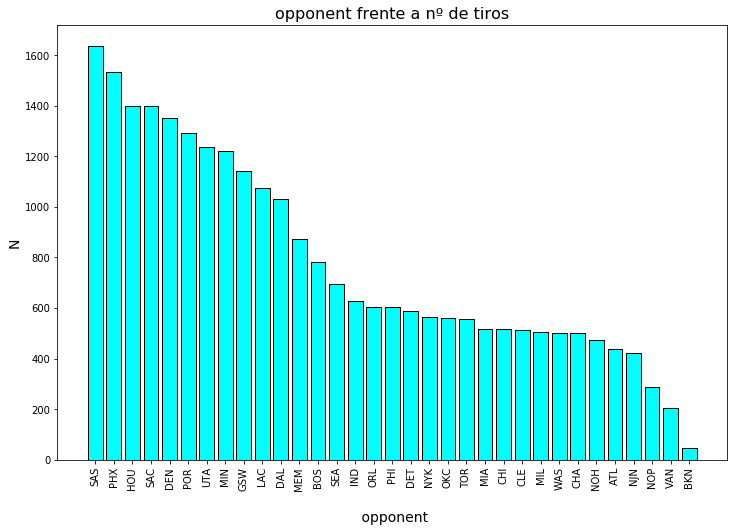

In [49]:
plt.figure(figsize=(12,8))
oponente=opponent.index # Categorías.
n=opponent.values # Valores.
plt.bar(oponente, n, color='cyan', edgecolor='black', width=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('\n opponent', fontsize=14)
plt.ylabel('N', fontsize=14)
plt.title('opponent frente a nº de tiros', fontsize=16)
plt.show()

Probablemente este resultado tenga que ver con el éxito de cada equipo oponente. Kobe era un jugador bastante notable en un equipo muy notable, por lo que como jugador exitoso en equipo exitoso se enfrentaría más frecuentemente a otros equipos exitosos. A más frecuencia de enfrentamientos más tiros.

In [50]:
opponent_flag = kobe_df.groupby('opponent')['shot_made_flag'].mean() # Media de éxito de tiro por oponente 
                                                                      # enfrentado.

In [51]:
opponent_flag = opponent_flag.sort_values(ascending=False)

Observamos la eficiencia de los tiros por cada uno de los oponentes enfrentados:

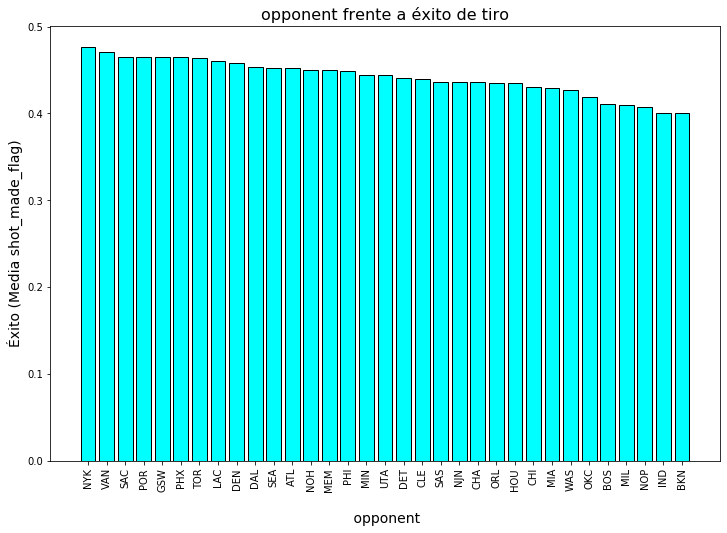

In [52]:
plt.figure(figsize=(12,8))
oponente = opponent_flag.index # Categorías.
media = opponent_flag.values # Valores.
plt.bar(oponente, media, color='cyan', edgecolor='black', width=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('\n opponent', fontsize=14)
plt.ylabel('Éxito (Media shot_made_flag)', fontsize=14)
plt.title('opponent frente a éxito de tiro', fontsize=16)
plt.show()

El éxito de tiro es muy similar para cada uno de los oponentes enfrentados. Al ser la media de éxito muy similar entre los distintos equipos, no parece que los oponentes influyeran mucho en el rendimiento de los tiros de Kobe.

### season

In [53]:
kobe_df['season'].unique() # Categorías de season.

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

In [54]:
season = kobe_df.groupby('season')['season'].count() # Variable con frecuencia de tiros por temporada. Refleja 
                                                      # season por nº de tiros.

Observamos cómo ha evolucionado el número de tiros a lo largo de las temporadas de juego de Kobe:

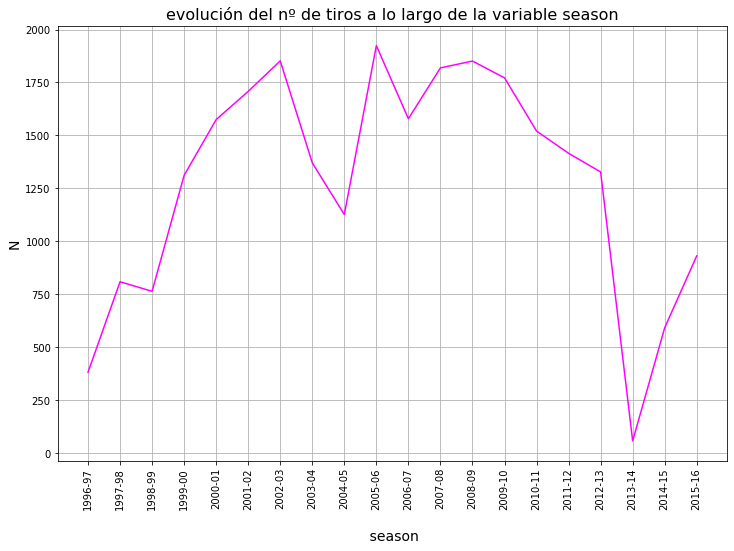

In [55]:
plt.figure(figsize=(12,8))
temporada = season.index # Categorías.
n = season.values # Valores.
plt.plot(temporada, n, color='magenta')
plt.xticks(rotation='vertical')
plt.xlabel('\n season', fontsize=14)
plt.ylabel('N', fontsize=14)
plt.grid()
plt.title('evolución del nº de tiros a lo largo de la variable season', fontsize=16)
plt.show()

Podemos ver un acusado ascenso hasta llegar a las temporadas 2001-02 y 2002-03, luego un leve descenso que se recupera en la temporada 2005-06, con cierto mantenimiento con ligeros altibajos hasta más o menos la temporada de 2010-11, momento en que decae hasta el mínimo más acusado de su carrera en 2013-14, tras la cual existe una recuperación hasta el final de su carrera, aunque no muy elevada.

In [56]:
season_flag = kobe_df.groupby('season')['shot_made_flag'].mean() # Las temporadas frente a la media de éxito de 
                                                                 # tiro en ellas.

Observamos cómo el éxito de tiro de Kobe evoluciona a lo largo de las temporadas:

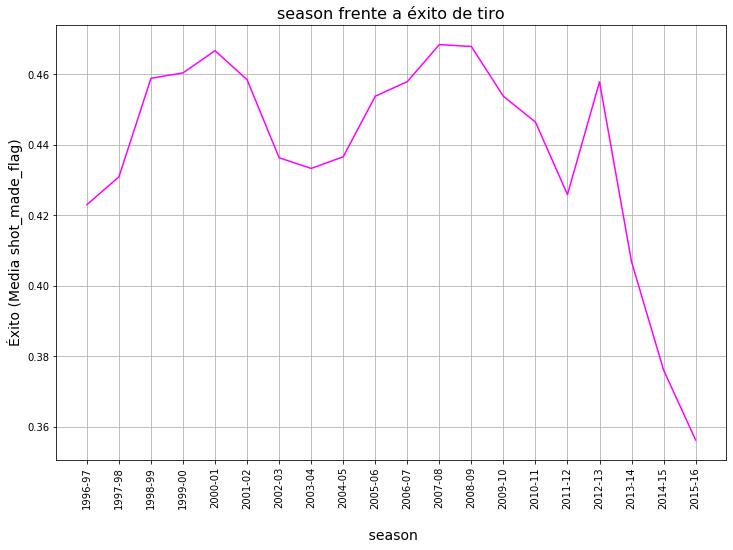

In [57]:
plt.figure(figsize=(12,8))
temporada = season_flag.index #  Categorías.
media = season_flag.values # Valores.
plt.plot(temporada, media, color='magenta')
plt.xticks(rotation='vertical')
plt.xlabel('\n season', fontsize=14)
plt.ylabel('Éxito (Media shot_made_flag)', fontsize=14)
plt.grid()
plt.title('season frente a éxito de tiro', fontsize=16)
plt.show()

El éxito de tiro aumenta  desde el inicio hasta llegar a la temporada 2000-01, decayendo moderadamente hasta la temporada de 2003-04, tras la cual se recupera hasta alcanzar un pico algo superior al anterior en la temporada 2007-2008. Tras ello hay un declive moderado  hasta  la temporada 2011-12, se recupera en la siguiente temporada  y después cae acusadamente hasta el final de su carrera.

### matchup

En esta variable se despliegan los diferentes emparejamientos de equipos para los partidos. Parece ser que el 
"@" indica que el equipo de Kobe era visitante , y el "vs" que era residente. En función de esto realizaré el análisis de la variable.

In [58]:
kobe_df['matchup'].unique() # Se observa el "@" y el "vs."

array(['LAL @ POR', 'LAL vs. UTA', 'LAL @ VAN', 'LAL vs. LAC',
       'LAL @ HOU', 'LAL @ SAS', 'LAL vs. HOU', 'LAL vs. DEN',
       'LAL @ SAC', 'LAL @ DEN', 'LAL vs. CHI', 'LAL vs. GSW',
       'LAL vs. MIN', 'LAL @ LAC', 'LAL vs. IND', 'LAL @ SEA',
       'LAL vs. SAS', 'LAL vs. DAL', 'LAL vs. PHI', 'LAL @ GSW',
       'LAL vs. SEA', 'LAL vs. DET', 'LAL vs. MIL', 'LAL vs. VAN',
       'LAL @ TOR', 'LAL @ MIA', 'LAL @ DAL', 'LAL vs. POR', 'LAL @ PHX',
       'LAL vs. CLE', 'LAL @ UTA', 'LAL vs. MIA', 'LAL vs. NJN',
       'LAL @ NYK', 'LAL @ CLE', 'LAL @ MIN', 'LAL vs. CHH',
       'LAL vs. SAC', 'LAL vs. PHX', 'LAL @ NJN', 'LAL @ PHI',
       'LAL @ CHH', 'LAL @ IND', 'LAL vs. TOR', 'LAL @ DET', 'LAL @ WAS',
       'LAL @ ORL', 'LAL @ ATL', 'LAL @ MIL', 'LAL vs. NYK',
       'LAL vs. MEM', 'LAL vs. ORL', 'LAL @ MEM', 'LAL @ CHI',
       'LAL vs. WAS', 'LAL vs. ATL', 'LAL vs. BOS', 'LAL @ BOS',
       'LAL vs. NOH', 'LAL @ NOH', 'LAL @ UTH', 'LAL vs. SAN',
       'LAL @ NOK', 'LAL @ 

Creo en el dataset una nueva variable o columna que indique si el equipo de Kobe durante el partido donde se realizó el tiro del registro era visitante (@) o residente (vs). En primer lugar modifico los registros y los almaceno en una lista:

In [59]:
visita_residencia = [] # Lista para alojar la modificación hecha a la variable

for index, row in kobe_df.iterrows(): # Por cada índice y fila en kobe_df.
    
    if '@' in row['matchup']:
        visita_residencia.append('@') #Trato y genero los datos. Añado @ a la lista.
    else:
        visita_residencia.append('vs') # Añado vs a la lista.      

Creo la variable en el dataset y añado los registros modificados usando la lista antes creada:

In [60]:
kobe_df['visitante_residente'] = visita_residencia 

In [61]:
vis_res=kobe_df['visitante_residente'].value_counts() # Categorías de visitante_residente por nº de tiros

In [62]:
vis_res

@     13212
vs    12485
Name: visitante_residente, dtype: int64

Observamos el nº de tiros en función de si el equipo de Kobe era residente o visitante:

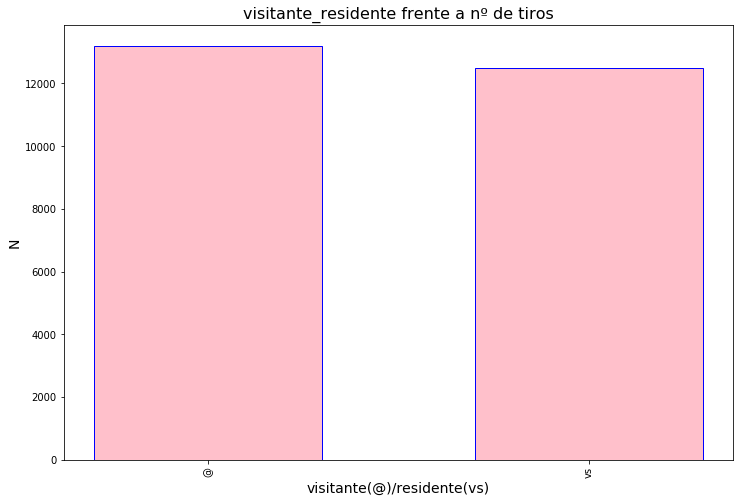

In [63]:
plt.figure(figsize=(12,8))

plt.bar(vis_res.index, vis_res.values, color='pink', edgecolor='blue', width=0.6)

plt.xticks(rotation='vertical')
plt.xlabel('visitante(@)/residente(vs)', fontsize=14)
plt.ylabel('N', fontsize=14)

plt.title('visitante_residente frente a nº de tiros', fontsize=16)

plt.show()

Parece ser que Kobe realizaba más tiros cuando era visitante.

In [64]:
# Éxito de tiro en función de si Kobe era residente o visitante:

visres_flag = kobe_df.groupby('visitante_residente')['shot_made_flag'].mean()

Observamos el éxito de tiro en función de si el equipo de Kobe era residente o visitante:

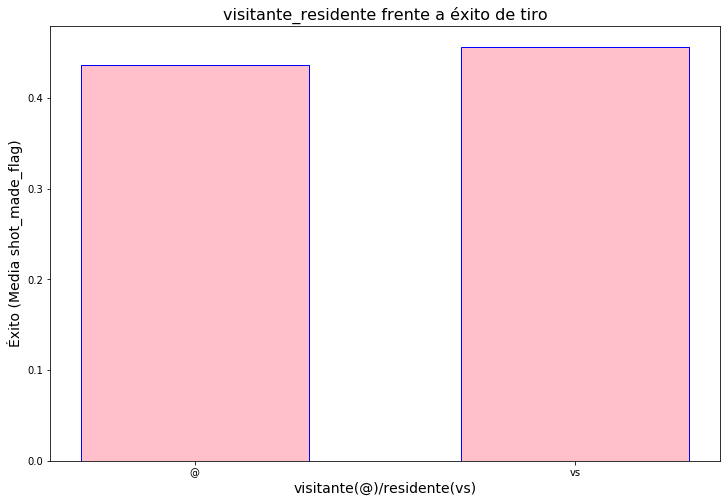

In [65]:
plt.figure(figsize=(12,8))

plt.bar(visres_flag.index, visres_flag.values, color='pink', edgecolor='blue', width=0.6)

plt.xlabel('visitante(@)/residente(vs)', fontsize=14)
plt.ylabel('Éxito (Media shot_made_flag)', fontsize=14)

plt.title('visitante_residente frente a éxito de tiro', fontsize=16)

plt.show()

Aunque Kobe realizara más tiros siendo visitante, acertaba más siendo residente.

### playoffs

In [66]:
kobe_df['playoffs']. unique() # Es una variable binaria. 0 indica que el disparo no se hizo en playoffs, 1 que 
                              # se hizo en playoffs.

array([0, 1])

In [67]:
playoffs = kobe_df['playoffs'].value_counts() # Nº de tiros por categoría de playoffs.

Observamos el número de tiros en función de si el partido es de playoffs o no:

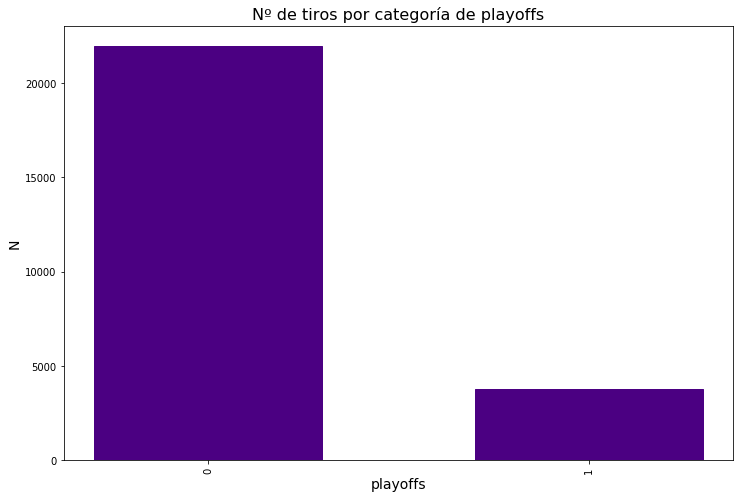

In [68]:
plt.figure(figsize=(12,8))

playoffs_l = ['0','1'] # Categorías.
plt.bar(playoffs_l, playoffs.values, color='indigo', edgecolor='indigo', width=0.6)

plt.xticks(rotation='vertical')
plt.xlabel('playoffs', fontsize=14)
plt.ylabel('N', fontsize=14)

plt.title('Nº de tiros por categoría de playoffs', fontsize=16)

plt.show()

Existen muchos más tiros en la categoría "no playoffs" que en la categoría "playoffs".

In [69]:
#Media de éxitos por categoría de playoffs:

kobe_df['playoffs']=kobe_df['playoffs'].apply(str) # Convierto las categorías en string.
playoffs_flag=kobe_df.groupby('playoffs')['shot_made_flag'].mean()

In [70]:
playoffs_flag

playoffs
0    0.446420
1    0.444651
Name: shot_made_flag, dtype: float64

Observamos el éxito de tiro por categoría de playoffs:

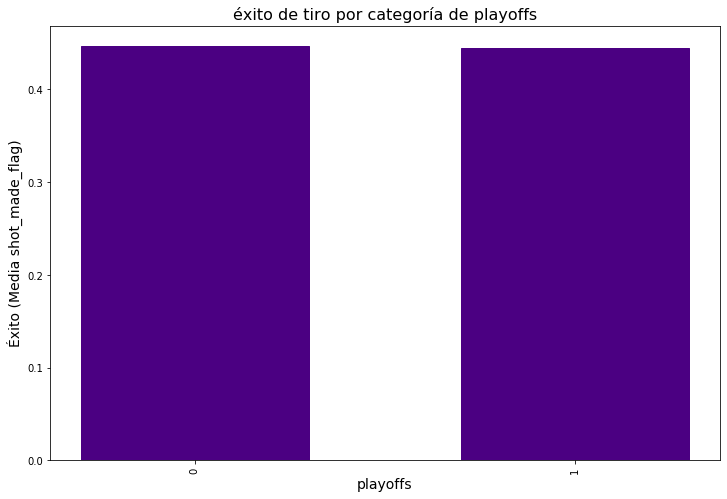

In [71]:
plt.figure(figsize=(12,8))

plt.bar(playoffs_flag.index, playoffs_flag.values, color='indigo', edgecolor='indigo', width=0.6)

plt.xticks(rotation='vertical')
plt.xlabel('playoffs', fontsize=14)
plt.ylabel('Éxito (Media shot_made_flag)', fontsize=14)

plt.title('éxito de tiro por categoría de playoffs', fontsize=16)

plt.show()

Tanto partidos que no son de playoffs como aquellos que sí son de playoffs presentan una eficiencia similar en los tiros realizados.

### shot_zone_range

In [72]:
kobe_df['shot_zone_range'].unique() #Categorías de shot_zone_range.

array(['8-16 ft.', '16-24 ft.', 'Less Than 8 ft.', '24+ ft.',
       'Back Court Shot'], dtype=object)

In [73]:
range_dist = kobe_df.groupby('shot_zone_range')['shot_zone_range'].count() #shot_zone range respecto a nº de tiros.

In [74]:
range_dist

shot_zone_range
16-24 ft.          6907
24+ ft.            5281
8-16 ft.           5580
Back Court Shot      72
Less Than 8 ft.    7857
Name: shot_zone_range, dtype: int64

In [75]:
range_dist = range_dist.sort_values(ascending=False) #Ordenamos para una mejor visualización.

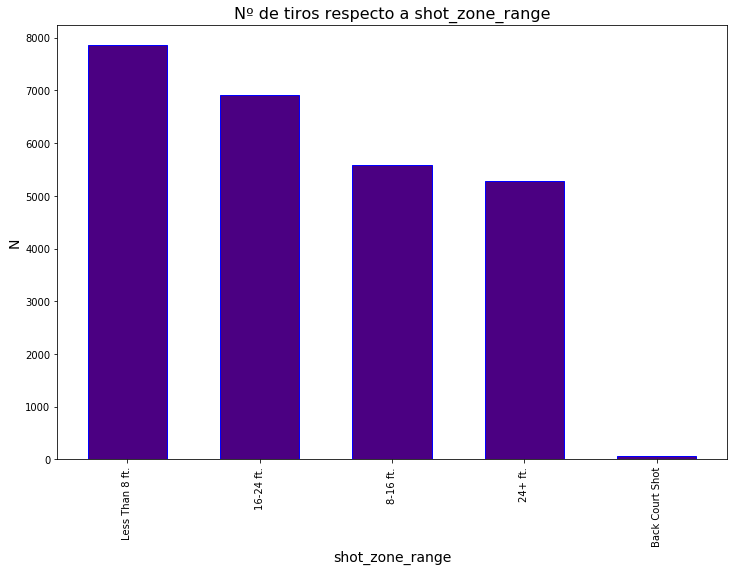

In [76]:
plt.figure(figsize=(12,8))

plt.bar(range_dist.index, range_dist.values, color='indigo', edgecolor='blue', width=0.6)

plt.xticks(rotation='vertical')
plt.xlabel('shot_zone_range', fontsize=14)
plt.ylabel('N', fontsize=14)

plt.title('Nº de tiros respecto a shot_zone_range', fontsize=16)

plt.show()

Por orden descendente en el número de tiros nos encontramos a:

- "Less Than 8 ft."
- "16-24 ft."
- "8-16 ft."
- "24+ ft."
- "Back Court Shot"

In [77]:
range_success = kobe_df.groupby('shot_zone_range')['shot_made_flag'].mean() # Categoría de shot_zone_range 
                                                                             # por éxito de tiro.

In [78]:
range_success = range_success.sort_values(ascending=False)

In [79]:
range_success

shot_zone_range
Less Than 8 ft.    0.573120
8-16 ft.           0.435484
16-24 ft.          0.401766
24+ ft.            0.332513
Back Court Shot    0.013889
Name: shot_made_flag, dtype: float64

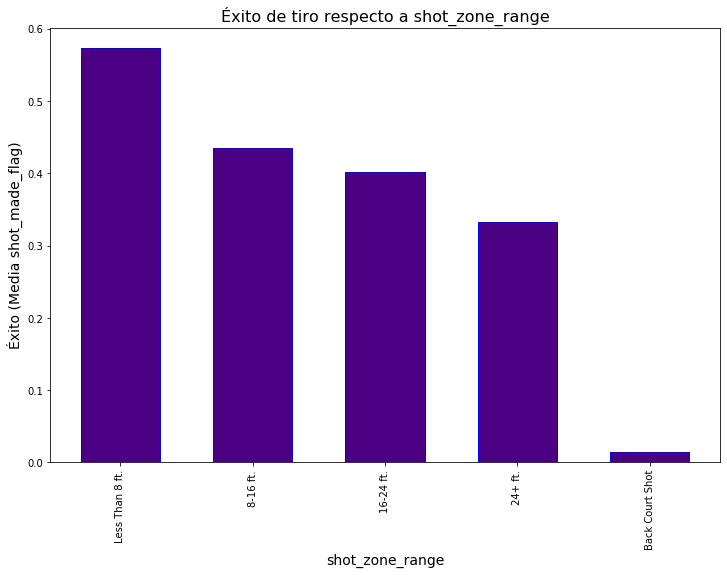

In [80]:
plt.figure(figsize=(12,8))

plt.bar(range_success.index, range_success.values, color='indigo', edgecolor='blue', width=0.6)

plt.xticks(rotation='vertical')
plt.xlabel('shot_zone_range', fontsize=14)
plt.ylabel('Éxito (Media shot_made_flag)', fontsize=14)

plt.title('Éxito de tiro respecto a shot_zone_range', fontsize=16)

plt.show()

Por orden descendente en el éxito de tiro nos encontramos a:

- "Less Than 8 ft."
- "8-16 ft."
- "16-24 ft."
- "24 ft."
- "Back Court Shot"

## VARIABLES CUANTITATIVAS

### shot_distance

In [81]:
shot_distance = kobe_df.groupby('shot_distance')['shot_distance'].count() # Nº de tiros por shot_distance.

Observamos cómo evoluciona el nº o la frecuencia de tiro con respecto a la distancia:

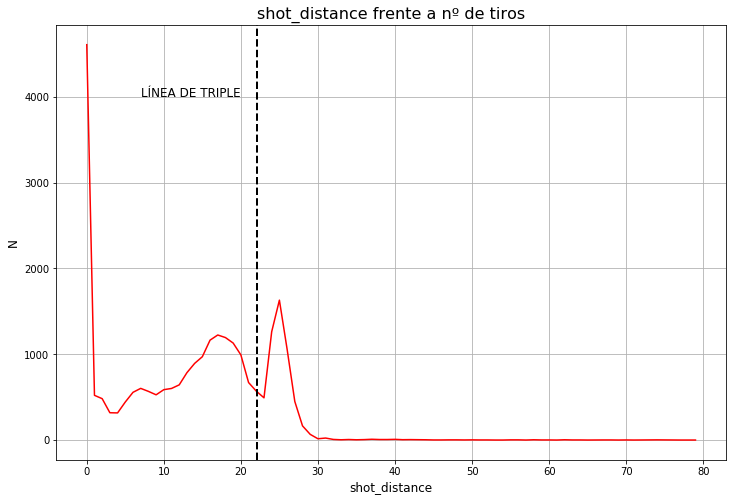

In [82]:
plt.figure(figsize=(12,8))

distancia = shot_distance.index # Valores de shot_distance.
n = shot_distance.values # Nº de tiros.
plt.plot(distancia, n, color='red')
plt.xlabel('shot_distance', fontsize=12)
plt.ylabel('N', fontsize=12)
plt.text (7, 4000, 'LÍNEA DE TRIPLE', fontsize=12)
plt.axvline(22.15, color='black', linestyle='dashed', linewidth=2)
plt.title('shot_distance frente a nº de tiros', fontsize=16)
plt.grid()
plt.show()

Como es lógico, a más distancia  menos se atreve Kobe a tirar, aunque hay un pico  curioso entre los 20 y los 30 pies, probablemente correspondiente a la zona cercana a la línea de triples.

In [83]:
distance_flag = kobe_df.groupby('shot_distance')['shot_made_flag'].mean() # Distancia por  media de éxito de tiro.

Observamos la evolución del éxito de tiro conforme aumenta la distancia:

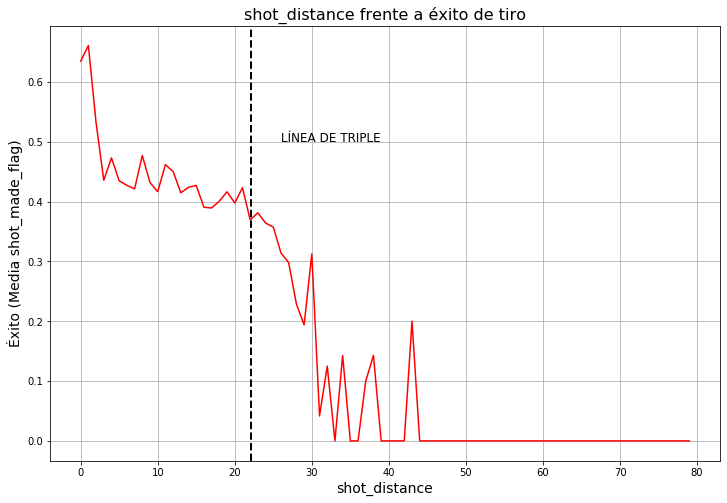

In [84]:
plt.figure(figsize=(12,8))

plt.plot(distance_flag.index, distance_flag.values, color='red')
plt.xlabel('shot_distance', fontsize=14)

plt.ylabel('Éxito (Media shot_made_flag)', fontsize=14)

plt.axvline(22.15, color='black', linestyle='dashed', linewidth=2)
plt.text (26,0.5, 'LÍNEA DE TRIPLE', fontsize=12)
plt.title('shot_distance frente a éxito de tiro', fontsize=16)
plt.grid()

plt.show()

Como es lógico, el éxito de tiro desciende acusadamente con la distancia, sobre todo más allá de la línea de triples. No obstante, son llamativos los bruscos picos de éxito entre la línea de triples y la distancia 45.

### seconds_remaining

In [85]:
seconds = kobe_df.groupby('seconds_remaining')['seconds_remaining'].count() # Nº de tiros por valor de 
                                                                            # seconds_remaining.

Observamos la evolución del nº de tiros a través de los distintos valores de seconds_remaining:

/home/luism/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


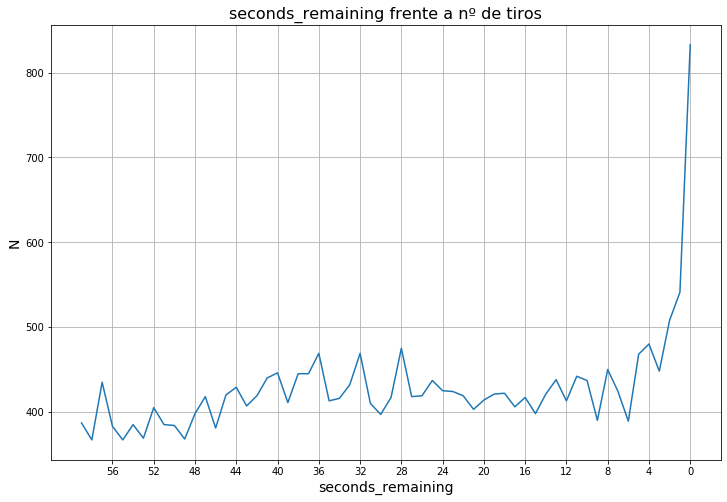

In [86]:
plt.figure(figsize=(12,8))


plt.plot(seconds.index, seconds.values)
plt.xlabel('seconds_remaining', fontsize=14)

plt.ylabel('N', fontsize=14)

plt.title('seconds_remaining frente a nº de tiros', fontsize=16)
plt.xticks(np.arange(0,60, 4))
axes().invert_xaxis() # Invertimos el eje x porque es una cuenta atrás.
plt.grid()
plt.show()

El número de tiros aumenta mucho en los últimos segundos faltantes, el resto del tiempo el número de tiros parece ser más o menos constante.

In [87]:
#media de éxito de tiro respecto a los valores de seconds_remaining:

seconds_flag = kobe_df.groupby('seconds_remaining')['shot_made_flag'].mean()

Observamos la eficiencia de los tiros (su éxito) conforme evolucionan los valores de seconds_remaining:

/home/luism/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


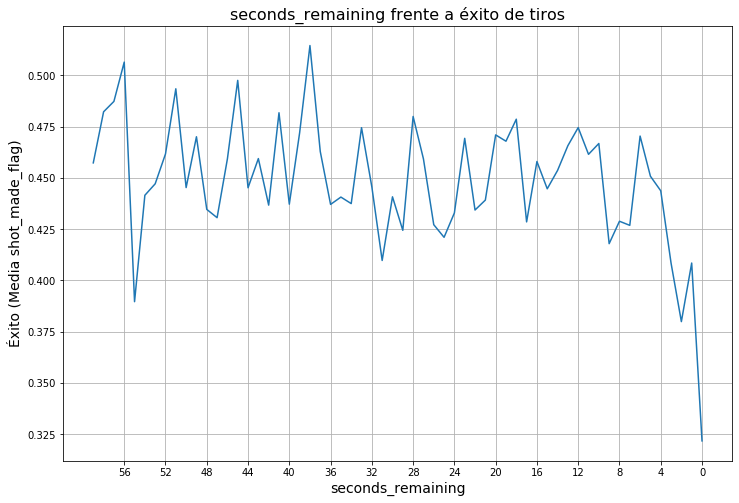

In [88]:
plt.figure(figsize=(12,8))

plt.plot(seconds_flag.index, seconds_flag.values)
plt.xlabel('seconds_remaining', fontsize=14)

plt.ylabel('Éxito (Media shot_made_flag)', fontsize=14)
plt.xlabel('seconds_remaining', fontsize=14)
plt.title('seconds_remaining frente a éxito de tiros', fontsize=16)
plt.xticks(np.arange(0,60, 4))
axes().invert_xaxis() # Invertimos el eje x porque es una cuenta atrás.
plt.grid()
plt.show()

La eficiencia de los disparos parece oscilar en un mismo rango a lo largo de todos los segundos restantes excepto al llegar a valores cercanos a los 0 segundos, donde el rendimiento parece caer en picado.

### minutes_remaining

In [89]:
minutes = kobe_df.groupby('minutes_remaining')['minutes_remaining'].count() # Nº de tiros respecto a los distintos
                                                                            # valores de minutes_remaining.

Observamos la evolución del nº de tiros a lo largo de la variable minutes_remaining:

/home/luism/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


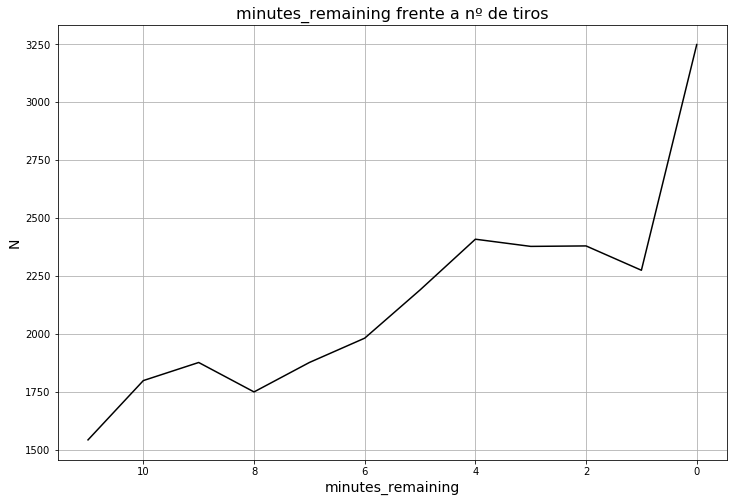

In [90]:
plt.figure(figsize=(12,8))


plt.plot(minutes.index, minutes.values, color='black')
plt.xlabel('minutes_remaining', fontsize=14)

plt.ylabel('N', fontsize=14)
plt.title('minutes_remaining frente a nº de tiros', fontsize=16)
axes().invert_xaxis() # Invertimos el eje x porque es una cuenta atrás.
plt.grid()
plt.show()

Conforme los minutos progresan hacia 0 el nº de tiros va progresando, haciéndose esta progresión muy empinada a partir del minuto 1.

In [91]:
#Media de éxito de tiro respecto a minutes_remaining:


minutes_flag = kobe_df.groupby('minutes_remaining')['shot_made_flag'].mean()

Observamos la evolución del éxito de tiro a lo largo de los minutos restantes:

/home/luism/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


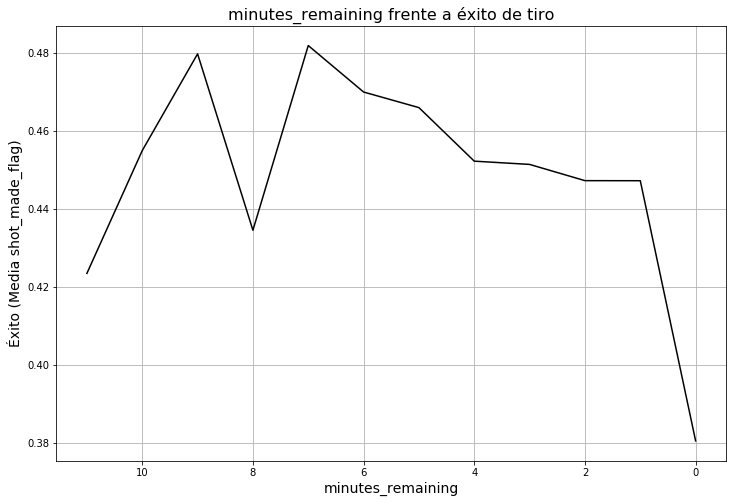

In [92]:
plt.figure(figsize=(12,8))


plt.plot(minutes_flag.index, minutes_flag.values, color='black')
plt.xlabel('minutes_remaining', fontsize=14)

plt.ylabel('Éxito (Media shot_made_flag)', fontsize=14)
axes().invert_xaxis() # Invertimos el eje x porque es una cuenta atrás.
plt.title('minutes_remaining frente a éxito de tiro', fontsize=16)
plt.grid()
plt.show()

El éxito de los disparos va disminuyendo en una progresión lenta hasta el minuto 1, donde entra en rápido declive. Llama la atención el rápido descenso y la rápida recuperación del éxito en el rango del minuto 9 al 6. Hay un aumento del éxito desde el minuto 11 al 10.

### loc_x y loc_y

Estas dos variables, tomadas juntas, dan indicaciones en coordenadas cartesianas de la posición de los tiros. Por tanto, las represento juntas para mostrar las distintas posiciones de tiro de Kobe. No, obstante, estas variables serán exploradas en otros notebooks ('POSICIONES_KOBE_loc_x-loc_y', EXITO_POSICIONES_KOBE_loc_x-loc_y). El motivo es que, para representarlas con mayor claridad y visibilidad, estas variables serán representadas a lo largo de las distintas temporadas de Kobe Bryant, en su evolución a lo largo del tiempo, mediante una imagen en formato gif. Llevar a cabo esto en este mismo cuaderno hubiera sido algo engorroso.

#### Dibujo de shot_zone_area y shot_zone_basic en base a las posiciones de tiro.

Aunque en este cuaderno no se realiza el análisis exploratorio de las parejas de variables loc_x/loc_y, si se elaboran dos gráficas relacionadas con ellas y que sirven para aclarar la naturaleza de las variables shot_zone_area y shot_zone_basic. Así, procedo a dibujar las gráficas que aparecen en la memoria escrita de shot_zone_area y shot_zone_basic en base a las posiciones de tiro, para reflejar la distribución espacial de las categorías de estas variables:

Para representar loc_x y loc_y, he utilizado una función ampliamente distribuida por internet, que dibuja una cancha de baloncesto, así tiene más sentido la representación gráfica de las parejas de variables loc_x y loc_y:

In [93]:
#Creo una función para dibujar la cancha de baloncesto:


from matplotlib.patches import Circle, Rectangle, Arc, ConnectionPatch

def table(ax=None, color='Black', lw=2, outer_lines=False):
   # Si no se proporciona un objeto de ejes, se crea uno:
    if ax is None:
        ax = plt.gca()

   #Distintas partes del tablero de baloncesto. He creado el tablero entero. Los componentes
# del tablero pertenecientes a la parte inferior del tablero presentan el prefijo "inf_" y los pertenecientes 
# a la parte superior presentan el prefijo "sup_"

    # Aro
    # El diámetro de un aro es de 18 ", por lo que tiene un radio de 9", que es un valor
    # 7.5 en nuestro sistema de coordenadas
    inf_hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
    sup_hoop= Circle ((0,844.5), radius=7.5, linewidth=lw, color=color, fill=False)

    # Tablero de la canasta.
    inf_backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)
    sup_backboard = Rectangle((-30, 852.5), 60, -1, linewidth=lw, color=color)

    # El área restringuida
    # la caja externa del área restringuida, ancho=16ft, altura=19ft
    inf_outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                               fill=False)
    # La caja interna del área restringuida, ancho=12ft, altura=19ft
    inf_inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                               fill=False)
    
    sup_outer_box = Rectangle((80, 892.5), 160, 190, angle=180, linewidth=lw, color=color,
                               fill=False)
   
    sup_inner_box = Rectangle((60, 892.5), 120, 190, angle=180, linewidth=lw, color=color,
                               fill=False)

    # Arco superior de tiro libre 
    inf_top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                              linewidth=lw, color=color, fill=False)
    sup_top_free_throw = Arc((0, 702.5), 120, 120, theta1=0, theta2=180,
                             linewidth=lw, color=color, fill=False, angle=180)
    
    # Arco inferior del tiro libre
    inf_bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    sup_bottom_free_throw = Arc((0, 702.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed',angle=180)
    
    #zona restringida, Es un arco de 4ft de radio del centro al aro.
    inf_restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                          color=color)
    sup_restricted = Arc((0, 845), 80, 80, theta1=0, theta2=180, linewidth=lw,
                          color=color, angle=180)

    # Línea de tres puntos
    # Creación de las líneas laterales de tres puntos, tienen 14ft de largo antes de comenzar a arquearse.
    inf_corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                                    color=color)
    inf_corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    
    sup_corner_three_a = Rectangle((-220, 892.5), 0, 140, linewidth=lw,angle=180,
                                    color=color)
    sup_corner_three_b = Rectangle((220, 892.5), 0, 140, linewidth=lw, angle=180,
                                    color=color)
    
    # Arco de tres puntos-el centro del arco será el aro, el arco está a 23'9 "de distancia del aro.
    
    inf_three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                         color=color)
    sup_three_arc = Arc((0,843), 475, 475, theta1=22, theta2=158, linewidth=lw,
                        color=color, angle=180)

    # Centro de la cancha 
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=0.0, theta2=360,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=0.0, theta2=360,
                           linewidth=lw, color=color)
    
    #Línea lateral
    a = (-250,422.5)
    b = (250,422.5)
    coordsA = "data"
    coordsB = "data"
    
    lateral_line = ConnectionPatch(a,b, coordsA, coordsB ,arrowstyle='-', linewidth=lw)

    # Lista de los elementos de la cancha que se dibujarán en los ejes:
    court_elements = [inf_hoop, sup_hoop, inf_backboard, sup_backboard, inf_outer_box, inf_inner_box, inf_top_free_throw, sup_top_free_throw,
                      inf_bottom_free_throw, sup_bottom_free_throw ,inf_restricted, sup_restricted, inf_corner_three_a,
                      inf_corner_three_b, sup_corner_three_a, sup_corner_three_b, inf_three_arc, sup_three_arc, center_outer_arc,
                      center_inner_arc, lateral_line, sup_outer_box, sup_inner_box]

    if outer_lines:
        # Dibuja la línea de la mitad de la cancha, la línra de fondo y las líneas laterales.
        outer_lines = Rectangle((-250, -47.5), 500, 940, linewidth=lw, 
                                color=color, fill=False)
        
        court_elements.append(outer_lines)

    # Añade los elementos de la cancha a los ejes:
    
    for element in court_elements:
        ax.add_patch(element)

    return ax

**shot_zone_area**

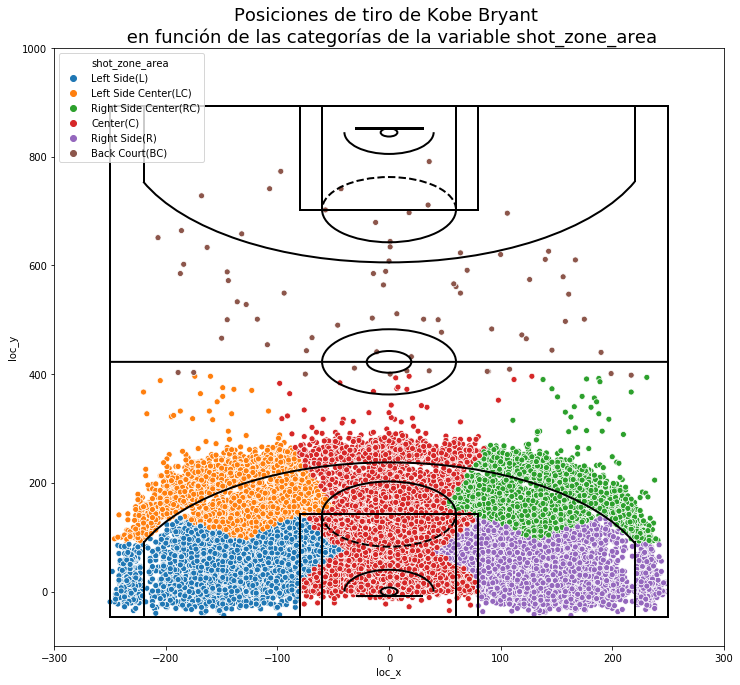

In [94]:
plt.figure(figsize=(12,11))
table(outer_lines=True) #Sobre el dibujo de la cancha...

#...Dibujo las posiciones de tiro:
plt.title('Posiciones de tiro de Kobe Bryant \n en función de las categorías de la variable shot_zone_area', 
           size= 18) 
    
sns.scatterplot(x='loc_x', y='loc_y',
                hue="shot_zone_area", # en base a shot_zone_area
                data=kobe_df)
plt.xlim(-300, 300)
plt.ylim(-100, 1000)
plt.show()

**shot_zone_basic**

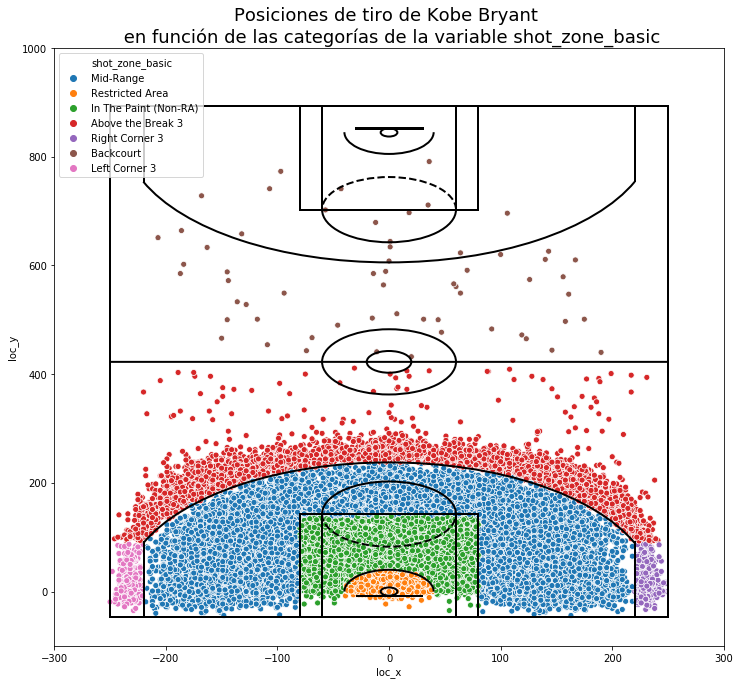

In [95]:
plt.figure(figsize=(12,11))
table(outer_lines=True) # Sobre el dibujo de la cancha...

#...Dibujo las posiciones de tiro:
plt.title('Posiciones de tiro de Kobe Bryant \n en función de las categorías de la variable shot_zone_basic', 
           size= 18) 
    
sns.scatterplot(x='loc_x', y='loc_y',
              hue="shot_zone_basic", # en base a shot_zone_basic.
              data=kobe_df)

plt.xlim(-300, 300)
plt.ylim(-100, 1000)
plt.show()

### Boxplots de la variable playoffs

Creo dos boxplots de éxito de tiro para cada categoría de playoffs, uno para los partidos de playoffs y otro para los partidos que no son de playoffs. Esta gráfica se decidió crearla con el fin de visualizar un poco más las características de la variable playoffs: 

In [96]:
playoffs_boxplot = [] # Genero una lista para guardar los resultados de éxito de tiro para la categoría 1 de 
                      # playoffs.

playoffs_data = kobe_df[kobe_df['playoffs']=='1'] #filtro por categoría de "playoffs".
playoffs = playoffs_data.groupby('game_id')['shot_made_flag'].mean() # Media de éxito de tiro por cada partido de 
                                                                     # playoffs.

playoffs_boxplot.append(playoffs.values) # Añado a la lista los valores. 

n_playoffs_data = kobe_df[kobe_df['playoffs']=='0'] #filtro por categoría " no playoffs".
n_playoffs = n_playoffs_data.groupby('game_id')['shot_made_flag'].mean() # Media de éxito de tiro por cada partido 
                                                                         # que no pertenece a playoffs.

playoffs_boxplot.append(n_playoffs.values)  #añado a la lista los valores.

In [97]:
playoffs_boxplot # Dos array en la lista, el primero con los resultados de los partidos de playoffs y el segundo 
                 # con los resultados de los partidos que no son de platoffs.

[array([0.5       , 0.7       , 0.38888889, 0.41176471, 0.5       ,
        0.47368421, 0.56      , 0.51612903, 0.45      , 0.52380952,
        0.5       , 0.31578947, 0.45      , 0.44444444, 0.3       ,
        0.4375    , 0.36363636, 0.22222222, 0.46666667, 0.4       ,
        0.55555556, 0.39130435, 0.37037037, 0.47368421, 0.58823529,
        0.4375    , 0.35      , 0.40909091, 0.45454545, 0.47368421,
        0.375     , 0.38461538, 0.61538462, 0.55      , 0.42857143,
        0.51851852, 0.35      , 0.31578947, 0.27272727, 0.55555556,
        0.47368421, 0.40625   , 0.36842105, 0.42857143, 0.42105263,
        0.5       , 0.57142857, 0.17647059, 0.5       , 0.375     ,
        0.3       , 0.5625    , 0.39130435, 0.4       , 0.63636364,
        0.57142857, 0.5       , 0.5       , 0.44444444, 0.38095238,
        0.5       , 0.4       , 0.5       , 0.33333333, 0.28571429,
        0.56521739, 0.36363636, 0.35      , 0.33333333, 0.31578947,
        0.54545455, 0.33333333, 0.64285714, 0.56

/home/luism/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


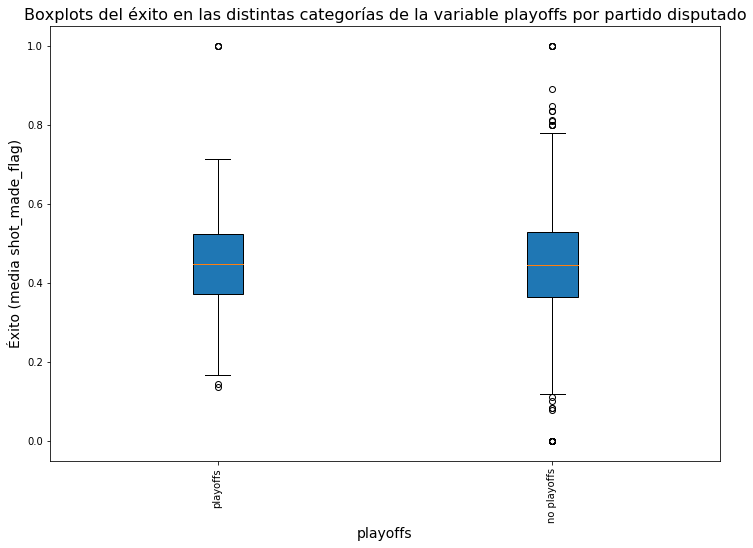

In [98]:
plt.figure(figsize=(12,8))

plt.boxplot(playoffs_boxplot, patch_artist=True) #Represento los boxplots

categorias = ['playoffs', 'no playoffs']
axes().set_xticklabels(categorias, rotation=90) #Añado las etiquetas de las categorías.

plt.xlabel('playoffs', fontsize=14)

plt.ylabel('Éxito (media shot_made_flag)', fontsize=14)

plt.title('Boxplots del éxito en las distintas categorías de la variable playoffs por partido disputado', 
           fontsize=16)

plt.show()